In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
# Load Iris dataset
wine = datasets.load_wine()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca)
print(X_test_pca)

[[-1.16602698e+00 -3.61532732e+00]
 [-3.86261156e+00 -4.82177461e-01]
 [ 2.28353786e+00  1.27503318e+00]
 [-1.67850727e+00 -2.49696152e+00]
 [ 1.57284216e+00  6.88203487e-01]
 [ 2.02555486e-01  2.22577338e+00]
 [ 8.83338617e-01  2.00469937e+00]
 [-7.15050214e-01  2.02557575e-01]
 [-2.31535447e+00 -3.50467442e-01]
 [ 2.48181734e+00 -1.19480758e+00]
 [ 9.27003335e-01  2.36914720e+00]
 [-1.10503027e+00  7.91750104e-01]
 [-2.64179811e+00 -3.73566993e-01]
 [ 2.82856352e+00 -9.08533324e-01]
 [ 4.68714502e-01  2.12468019e+00]
 [ 2.70840181e+00 -1.53490440e+00]
 [ 1.78020693e+00 -8.47127661e-01]
 [-2.75483138e+00 -2.13895379e+00]
 [-3.00838158e+00 -2.84596615e-01]
 [ 5.08790176e-01  2.03246235e+00]
 [ 1.36844583e+00  7.60471135e-01]
 [ 1.38621221e+00 -7.05661067e-01]
 [ 8.27658568e-01  2.30685810e+00]
 [ 2.56156818e+00 -3.30885610e-02]
 [-4.19073741e+00 -4.09150784e-01]
 [ 1.12473644e+00  2.47440627e+00]
 [ 2.10180811e+00  1.53564514e+00]
 [-2.90299543e+00 -1.15818973e+00]
 [ 1.77260388e+00 -7

In [5]:
# Train a perceptron model
ppn = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8)
ppn.fit(X_train_pca, y_train)

# show the weights w and fraction alpha
print('Weights: %s' % ppn.coef_)
print('Fraction alpha: %s' % ppn.intercept_)

Weights: [[ 0.41175408 -0.36762562]
 [-0.013152    0.55516527]
 [-0.2974019  -0.38521784]]
Fraction alpha: [-0.3 -0.2 -0.6]


In [6]:
# Number of misclassified samples
y_pred = ppn.predict(X_test_pca)
print('Misclassified %d' % (y_test != y_pred).sum())

Misclassified 0


In [7]:
# Accuracy score
print('Accuracy score %.2f' % accuracy_score(y_test, y_pred))

Accuracy score 1.00


In [8]:
# Plot linear classifiers for wine dataset
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'cyan', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

<ipython-input-8-2105af6573bc>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


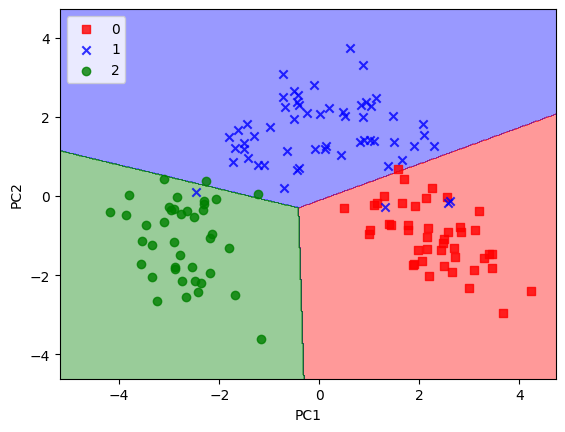

In [9]:
plot_decision_regions(X_train_pca, y_train, classifier=ppn)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

Confusion matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


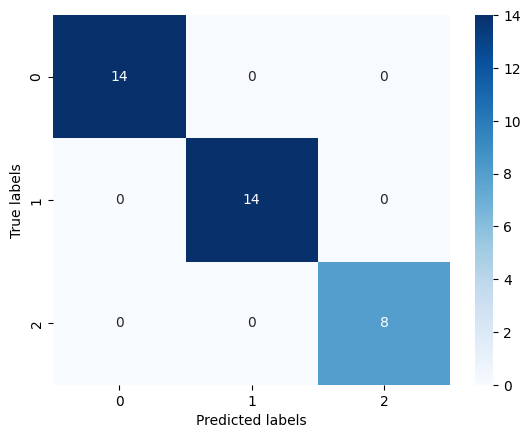

Precision: 1.000
Recall: 1.000
F1-score: 1.000
Sensitivity: 1.000
Specificity: 1.000
Accuracy score 1.000


In [10]:
# all test
# confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# precision, recall, f1-score, sensitivity, specificity
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('F1-score: %.3f' % f1_score(y_test, y_pred, average='micro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('Specificity: %.3f' % recall_score(y_test, y_pred, average='weighted'))
# Accuracy score
print('Accuracy score %.3f' % accuracy_score(y_test, y_pred))

[]
[array([ 0.29300535,  0.20976658,  0.3827986 , -0.71342936, -0.23520624,
       -0.00873264,  0.30507606,  0.30369335, -0.1000402 , -0.10308567,
        0.0764255 ,  0.14826449,  0.60558427, -0.51683104, -0.04876885,
       -0.42648482,  0.47617871,  0.07380343, -0.01159181, -0.02014228,
       -0.1548219 ,  0.23936029, -0.33493748,  0.62652245,  0.05020441,
       -0.22088187,  0.15117325,  0.08751703,  0.08058918,  0.02225631,
       -0.02590356, -0.0384879 , -0.37570777,  0.13311378, -0.11001758,
        0.32453795, -0.3318393 , -0.44412799, -0.00714611]), array([ 0.55609145,  0.23169835,  0.5229691 , -0.72795324, -0.01601486,
       -0.02919008,  0.20513881,  0.04550993,  0.01515981, -0.03979713,
       -0.06075157,  0.29140088,  0.88076442, -0.55354073,  0.03457189,
       -0.71760816,  0.28736827, -0.20018578,  0.00099738,  0.08479183,
       -0.09223198,  0.19637521, -0.48519394,  0.54936035,  0.0293593 ,
       -0.44759845,  0.1265881 , -0.05341467,  0.17793402, -0.04533087,

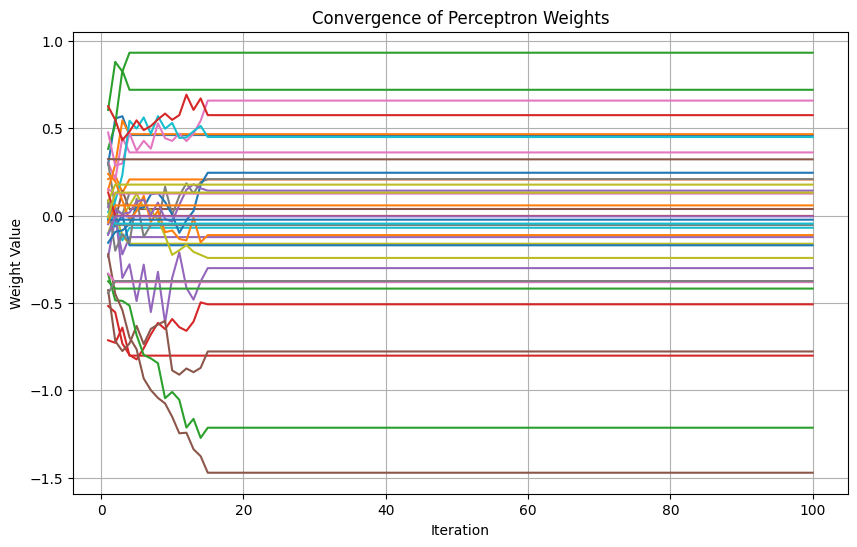

In [11]:
# Train a perceptron model with added convergence tracking
ppn = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8, warm_start=True)

weights_history = []  # To store the weights at each iteration

print(weights_history)

for _ in range(ppn.max_iter):
    ppn.partial_fit(X_train_std, y_train, classes=np.unique(y_train))
    weights_history.append(ppn.coef_.ravel().copy())

print(weights_history)

# Convert the list of weights into a numpy array for easy manipulation
weights_history = np.array(weights_history)

print(weights_history)
# Plot the convergence of weights
plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(range(1, ppn.max_iter + 1), weights_history[:, i], label=f'Weight {i + 1}')

plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Convergence of Perceptron Weights')
#plt.legend()
plt.grid(True)
plt.show()